In [12]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV, parse dates, and set index
csvpath = Path('../Resources/XRP_CAD.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-05,0.219835,0.237510,0.219079,0.233581,0.233581,144482988
2017-08-06,0.234417,0.239586,0.227825,0.228135,0.228135,93762510
2017-08-07,0.227215,0.230727,0.224493,0.226909,0.226909,73581036
2017-08-08,0.227646,0.246216,0.226089,0.244045,0.244045,228131481
2017-08-09,0.243970,0.244461,0.229453,0.232251,0.232251,124163955


<AxesSubplot:xlabel='Date'>

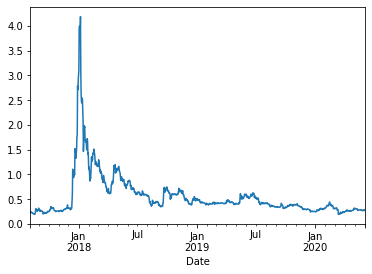

In [3]:
# Plot closing prices
df.Close.plot()

In [4]:
# Create a series using "Close" price percentage returns, drop any NaNs, and check the results:
# (Make sure to multiply the pct_change() results by *100)
df['Return'] = df.Close.pct_change() * 100
df['Lagged_Return'] = df['Return'].shift()
df = df.replace(-np.inf, np.nan).dropna()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2020-05-29,0.276407,0.279393,0.271496,0.273175,0.273175,2034690252,-1.132806,1.510693
2020-05-30,0.273176,0.284366,0.271216,0.284016,0.284016,2318117709,3.968518,-1.132806
2020-05-31,0.284039,0.291242,0.278043,0.279539,0.279539,2393218537,-1.576320,3.968518
2020-06-01,0.279440,0.286106,0.278560,0.285629,0.285629,2313438019,2.178587,-1.576320
2020-06-02,0.285694,0.289766,0.271597,0.271597,0.271597,2604752640,-4.912666,2.178587


<AxesSubplot:xlabel='Date'>

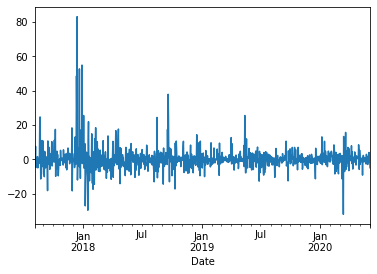

In [5]:
# Plot return
df['Return'].plot()

---

# Linear Regression with Train/Test split

In [6]:
# Create a train/test split for the data using 2017-2018 for training and 2019 for testing
train = df['2017':'2018']
test = df['2019']

In [7]:
# Create four DataFrames:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

In [8]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [9]:
# Make a prediction of "y" values using just the test dataset
predictions = model.predict(X_test)

In [10]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a DataFrame:
Results = y_test.to_frame()
Results["Predicted Return"] = predictions

<AxesSubplot:xlabel='Date'>

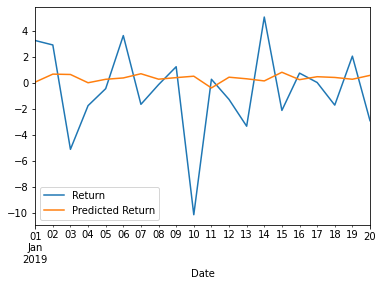

In [13]:
# Plot the first 20 predictions vs the true values
Results[:20].plot()

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the DataFrame above)
mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [ ]:
# Construct a DataFrame using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

---

Question: How does the model perform out-of-sample (on data that it has never seen before)? Are the predictions as good as, better, or worse than those that were observed for the training dataset?

Answer: The out-of-sample RMSE is lower than the in-sample RMSE. RMSE is typically lower for training data, but is higher in this case.